In [1337]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import seaborn as sns

I firstly create a program that models the hat game if we only have 2 pieces of paper on which numbers are written. I output the value we are left with, the 'difference', which must always be 1.

In [1338]:
var_1=0
var_2=0
max=0 
min=0
difference=0

values=np.zeros(2)
for i in range(2):
    values[i]=i+1

for i in range (1, 2):
    var_1=int(values[np.random.randint(0,2)])
    while (var_1==-1):
        var_1=int(values[np.random.randint(0,2)])
    values[var_1-1]=-1
    var_2=int(values[np.random.randint(0,2)])
    while(var_2==-1):
        var_2=int(values[np.random.randint(0,2)])
    if(var_1>var_2):
        max=var_1
        min=var_2
    else: 
        max=var_2
        min=var_1
    difference= max-min
    values[var_2-1]=difference 

print("The final value is " ,difference)

The final value is  1


I extend my program to model the game if we had 3 pieces of paper to start. 

In [1339]:
var_1=0
var_2=0
max=0 
min=0
difference=0


values=np.zeros(3)
for i in range(3):
    values[i]=i+1

for i in range (1, 3):
    var_1=int(values[np.random.randint(0,3)])

    while (var_1==-1):
        var_1=int(values[np.random.randint(0,3)])
    values[var_1-1]=-1
    var_2=int(values[np.random.randint(0,3)])
    while(var_2==-1):
        var_2=int(values[np.random.randint(0,3)])

    if(var_1>var_2):
        max=var_1
        min=var_2
    else: 
        max=var_2
        min=var_1
    difference= max-min
    values[var_2-1]=difference 


print("The final value is " ,difference)

The final value is  0


I again update my program- this time to consider the case where we have 4 pieces of paper to start.

In [1340]:
var_1=0
var_2=0
max=0 
min=0
difference=0


values=np.zeros(4)
for i in range(4):
    values[i]=i+1
print(values)

for i in range (1, 4):
    position=np.random.randint(0,4)

    while (int (values[position])==-1):
        position=np.random.randint(0,4)
    var_1=int(values[position])
    values[position]=-1
    position2=np.random.randint(0,4)
    
    while((values[position2]==-1) or (position==position2)):
         position2=np.random.randint(0,4)
    var_2=int(values[position2])

    print(var_1, var_2)
    if(var_1>var_2):
        max=var_1
        min=var_2
    else: 
        max=var_2
        min=var_1
    difference= max-min
    values[position2]=difference 

print("The final value is " ,difference)

[1. 2. 3. 4.]
4 1
2 3
3 1
The final value is  2


I define the function 'game' to perform the same simulation as before, but now we can choose the number of pieces of paper we have, as represented by 'n'.

In [1341]:
def game(n):
    var_1=0
    var_2=0
    max=0 
    min=0
    difference=0  

    values=np.zeros(n)
    for i in range(n):
        values[i]=i+1
    for i in range (1, n):
      position=np.random.randint(0,n)

      while (int (values[position])==-1):
          position=np.random.randint(0,n)
      var_1=int(values[position])
      values[position]=-1
      position2=np.random.randint(0,n)
    
      while((values[position2]==-1) or (position==position2)):
         position2=np.random.randint(0,n)
      var_2=int(values[position2])

      if(var_1>var_2):
          max=var_1
          min=var_2
      else: 
          max=var_2
          min=var_1
      difference= max-min
      values[position2]=difference 
    return difference

I create variables to store the results of the hat game if we have 4 pieces of paper to start. I call the function 'game' 1000 times, each time storing the final value of the sinulation in the 'results' array. From the number of each value achieved in the 1000 iterations, I calculate the expected value. I also create a scatter plot of the values achieved against the number of times they are achieved in the 1000 iterations. 

Number 0s:  433
Number 1s:  0
Number 2s:  436
Number 3s:  0
Number 4s:  131
expected value 1.396


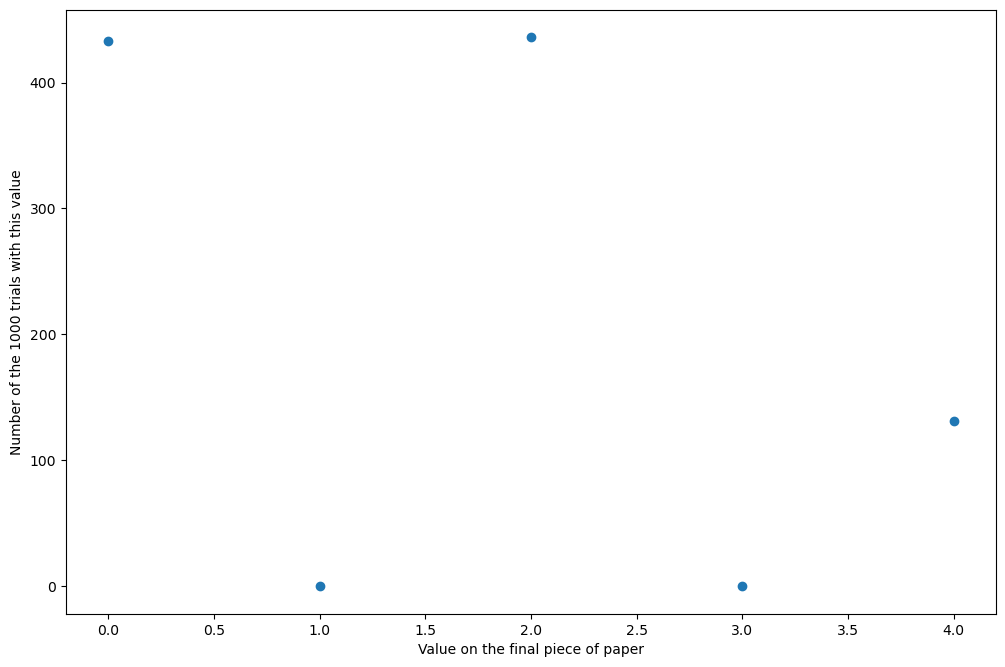

<Figure size 432x288 with 0 Axes>

In [1342]:
results=np.zeros(1000)
no_0s=0
no_1s=0
no_2s=0
no_3s=0
no_4s=0
for i in range (1000): 
    results[i]=game(4)
    if (results[i]==0):
        no_0s=no_0s+1
    if (results[i]==1):
        no_1s=no_1s+1
    if (results[i]==2):
        no_2s=no_2s+1
    if (results[i]==3):
        no_3s=no_3s+1
    if (results[i]==4):
        no_4s=no_4s+1

print("Number 0s: " , no_0s)
print("Number 1s: " , no_1s)
print("Number 2s: " , no_2s)
print("Number 3s: " , no_3s)
print("Number 4s: " , no_4s)

x=np.zeros(5)
for i in range(5):
    x[i]=i
y=np.zeros(5)
y[0]=no_0s
y[1]=no_1s
y[2]=no_2s
y[3]=no_3s
y[4]=no_4s

expected_value=0 
expected_value=1*(no_1s/1000)+2*(no_2s/1000)+3*(no_3s/1000)+4*(no_4s/1000)
print("expected value" ,expected_value)


fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value on the final piece of paper")
plt.ylabel("Number of the 1000 trials with this value")
plt.scatter(x,y)
plt.show()
plt.savefig("Assignment 3 scatter plot problem solving")


I now perform the same analysis with the case we are considering in the question- when we have 2024 pieces of paper to start. I output the expected value and the scatter graph from this analysis. I also create a histogram for the data I obtained to assess its probability distribution. Also, I output the mean, median and mode from the results of the 1000 trials.

The number of distinct values obtained was  409
expected value 349.0980000000001


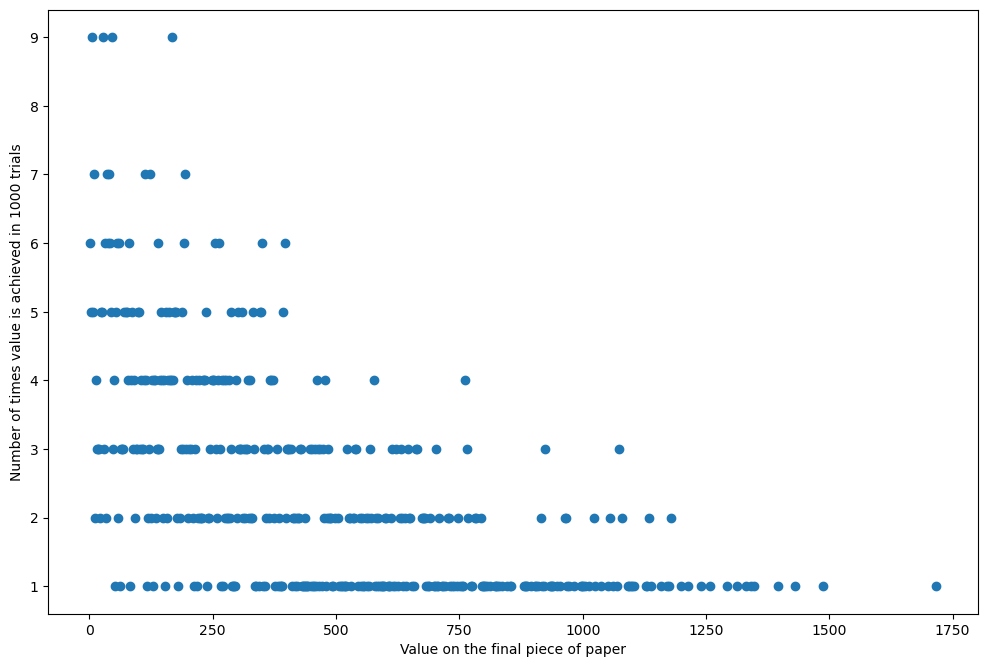

<Figure size 432x288 with 0 Axes>

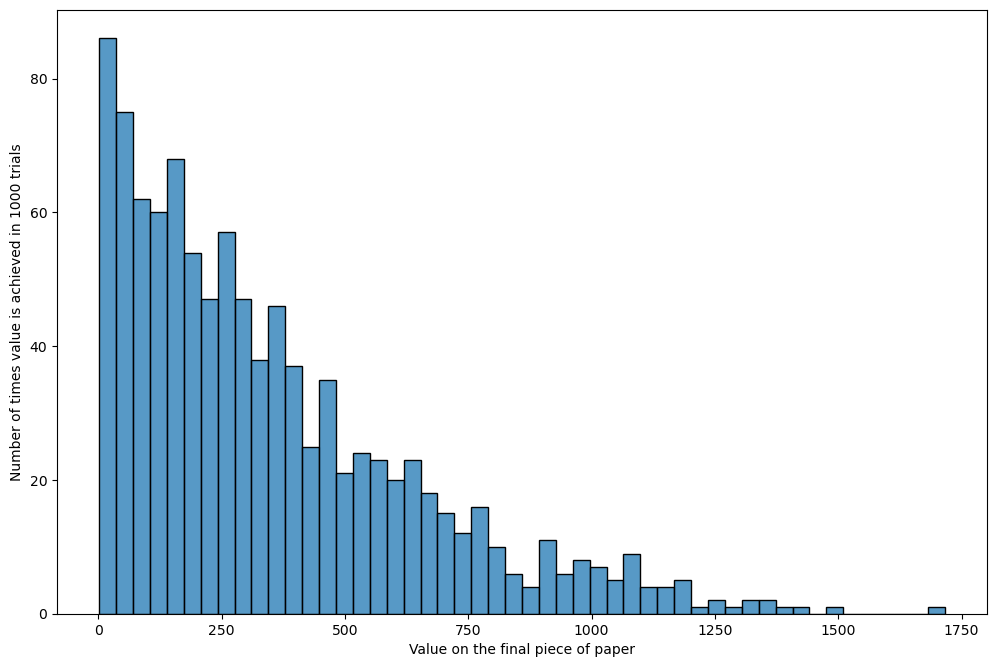

<Figure size 432x288 with 0 Axes>

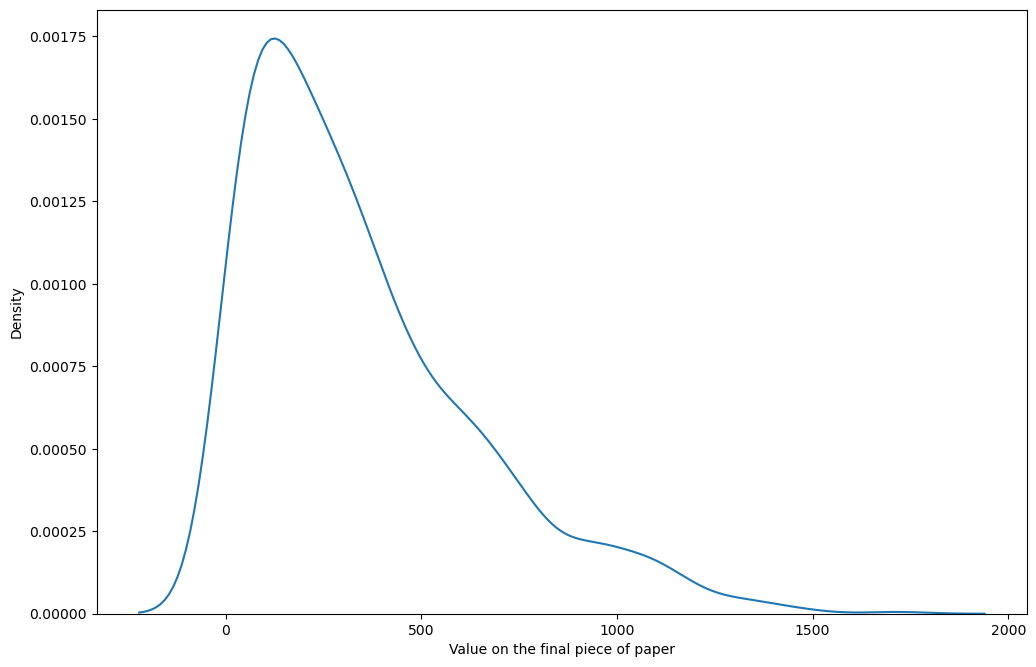

mean  349.098
median 272.0
mode  ModeResult(mode=array([6.]), count=array([9]))
variance  88038.42882482482


In [1343]:
results=np.zeros(1000)
y=np.zeros(2025)
x=np.zeros(2025)
for i in range(2025):
    x[i]=i

for i in range (1000): 
    results[i]=game(2024)
    if ((results[i])%2==1):
        print("Odd value achieved")
    y[int(results[i])]=y[int(results[i])]+1
count=0

for i in range(2025): 
    if (y[i]>0): 
        count=count+1

print("The number of distinct values obtained was " ,count)
results_2=np.zeros(count)
values=np.zeros(count)
k=0
expected_value=0
for i in range(2025):
    if (y[i]>0): 
        values[k]=i
        results_2[k]=y[i]
        expected_value=expected_value + values[k]*results_2[k]/1000
        k=k+1

print("expected value" ,expected_value)

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value on the final piece of paper")
plt.ylabel("Number of times value is achieved in 1000 trials")
plt.scatter(values, results_2)
plt.show()
plt.savefig("Assignment scatter plot h(24) distribution")

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value on the final piece of paper")
plt.ylabel("Number of times value is achieved in 1000 trials")
sns.histplot(results, bins=50)
plt.show()
plt.savefig("Assignment histogram problem solving")
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
sns.kdeplot(results)
plt.xlabel('Value on the final piece of paper')
plt.ylabel('Density')
plt.savefig("Assignment density plot problem solving")
plt.show()

print("mean " ,np.mean(results))
print("median" ,np.median(results))
print ("mode " ,stats.mode(results))
print("variance " ,np.var(results, ddof =1))



I update my program to perform 10000 simulations of the game rather than 1000, and perform the same analysis. I expect to get a more accurate representation of the probaility distribution for the value on the final piece of paper with more iterations of the game.

Number of different values obtained for h(n):  684


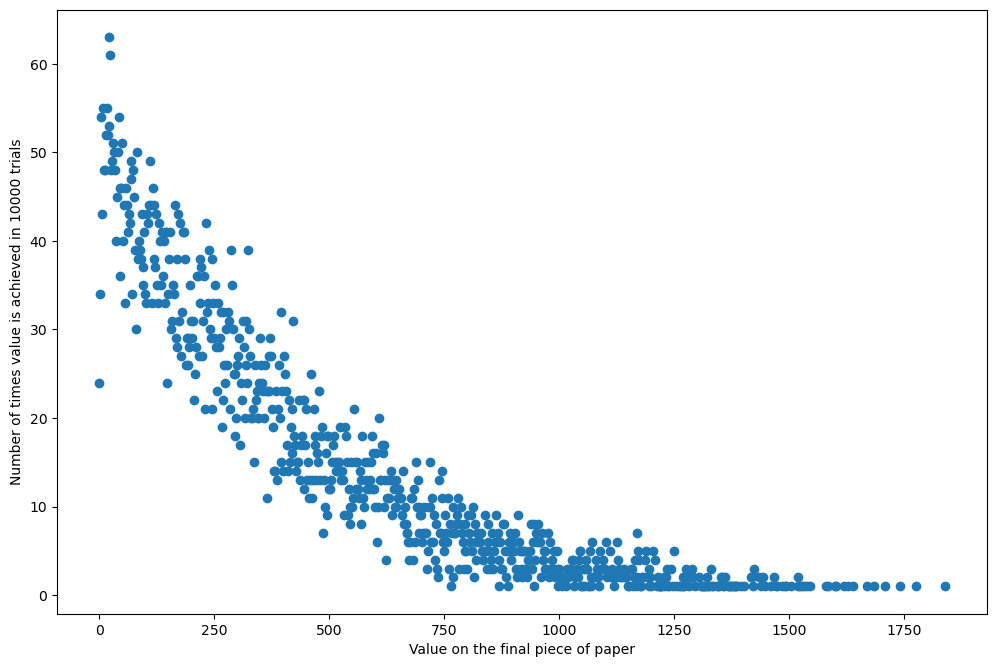

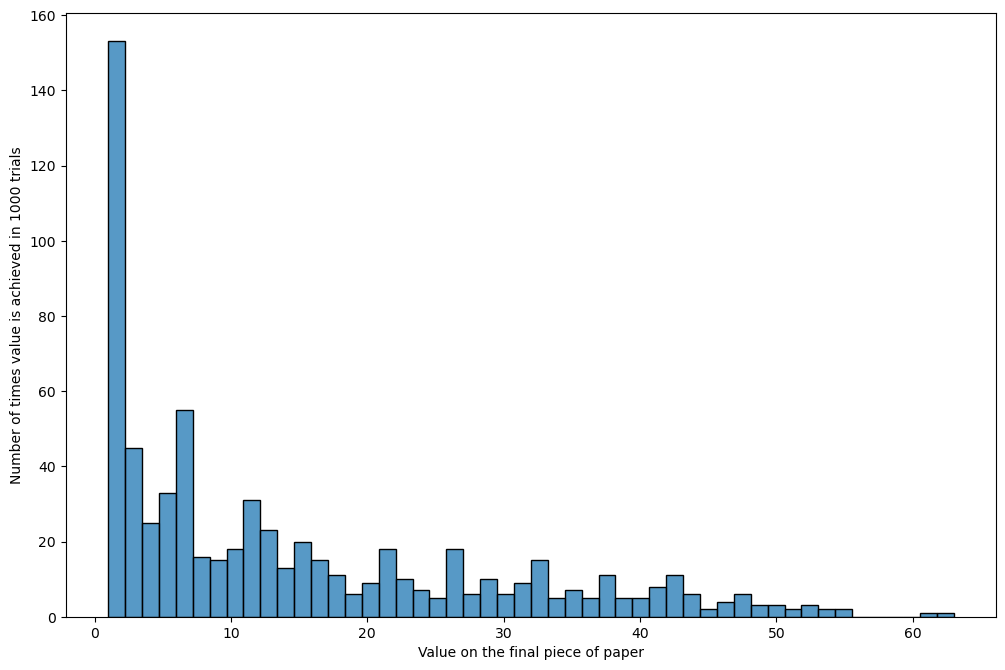

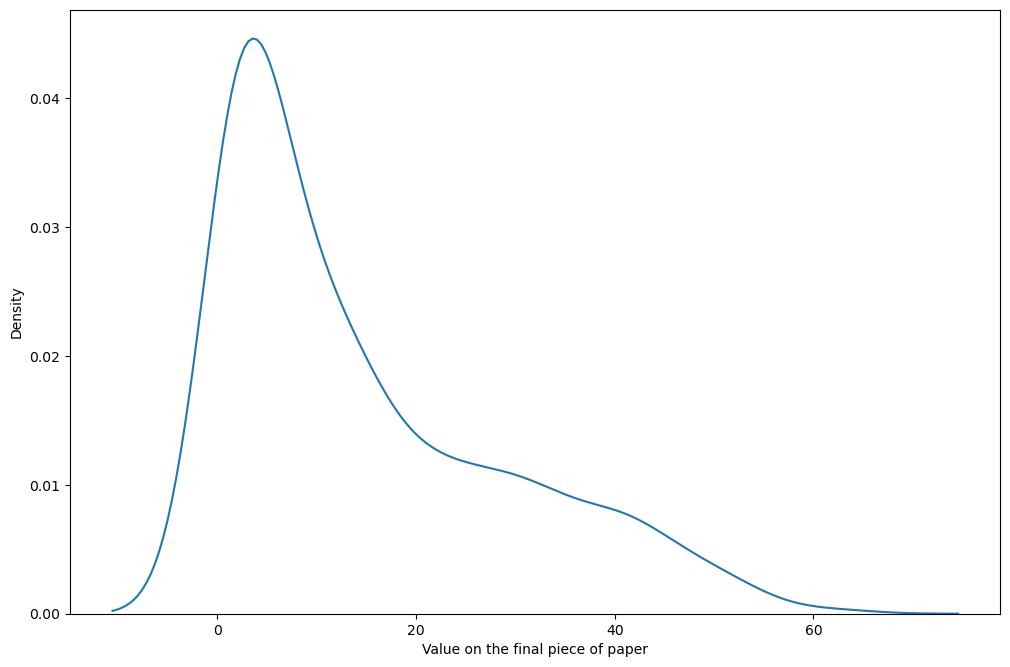

In [1344]:
results=np.zeros(10000)
y=np.zeros(2025)
x=np.zeros(2025)

for i in range(2025):
    x[i]=i

for i in range (10000): 
    results[i]=game(2024)
    y[int(results[i])]=y[int(results[i])]+1

count=0

for i in range(2025): 
    if (y[i]>0): 
        count=count+1

print("Number of different values obtained for h(n): " ,count)
results=np.zeros(count)
values=np.zeros(count)
k=0
for i in range(2025):
    if (y[i]>0): 
        values[k]=i
        results[k]=y[i]
        k=k+1


fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value on the final piece of paper")
plt.ylabel("Number of times value is achieved in 10000 trials")
plt.scatter(values, results)
plt.show()


fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value on the final piece of paper")
plt.ylabel("Number of times value is achieved in 1000 trials")
sns.histplot(results, bins=50)
plt.show()


fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
sns.kdeplot(results)
plt.xlabel('Value on the final piece of paper')
plt.ylabel('Density')
plt.show()

As an extension, I adapt my program so that at each iteration I pick 3 values and a replace them with the difference between the smallest and largets values.

In [1345]:
def game(n):
    var_1=0
    var_2=0
    var_3=0
    max=0 
    min=0
    difference=0  

    values=np.zeros(n)
    for i in range(n):
        
        values[i]=i+1
    for i in range (1, int(n/2)-1):
    
      position=np.random.randint(0,n)
      

      while (int (values[position])==-1):
          position=np.random.randint(0,n)
      var_1=int(values[position])
    
      values[position]=-1
      position2=np.random.randint(0,n)
    
      while((values[position2]==-1) or (position==position2)):
         position2=np.random.randint(0,n)
      
      var_2=int(values[position2])
      values[position2]=-1
      position3=np.random.randint(0,n)
    
      while((values[position3]==-1) or (position==position3) or (position2==position3)):
         position3=np.random.randint(0,n)
   
      var_3=int(values[position3])

      if((var_1>var_2) and (var_1>var_3)):
          if (var_2>var_3):
              max=var_1
              min=var_3
          else: 
              max=var_1
              min=var_2
      if((var_2>var_1) and (var_2>var_3)):
          if (var_1>var_3):
              max=var_2
              min=var_3
          else: 
              max=var_2
              min=var_1
      if((var_3>var_1) and (var_3>var_2)):
          if (var_1>var_2):
              max=var_3
              min=var_2
          else: 
              max=var_3
              min=var_1
      
      difference= max-min
      
      values[position3]=difference
    return difference

Number of different values obtained for h(n):  697


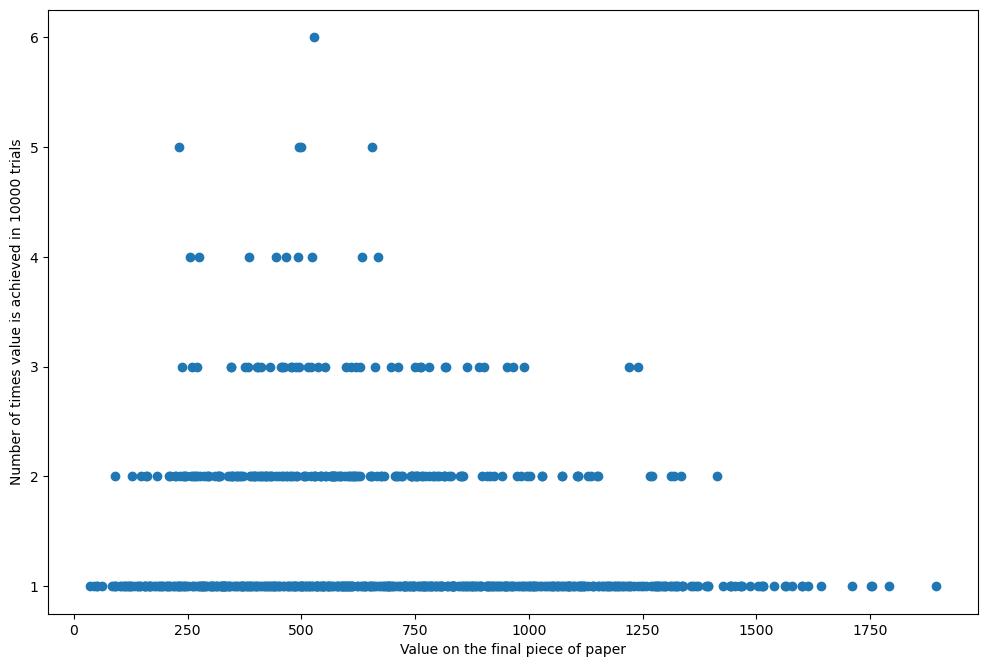

In [1346]:
results=np.zeros(1000)
y=np.zeros(2025)
x=np.zeros(2025)
for i in range(2025):
    x[i]=i

for i in range (1000): 
    results[i]=game(2024)
    y[int(results[i])]=y[int(results[i])]+1

count=0

for i in range(2025): 
    if (y[i]>0): 
        count=count+1

print("Number of different values obtained for h(n): " ,count)
results=np.zeros(count)
values=np.zeros(count)
k=0
for i in range(2025):
    if (y[i]>0): 
        values[k]=i
        results[k]=y[i]
        k=k+1


fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value on the final piece of paper")
plt.ylabel("Number of times value is achieved in 10000 trials")
plt.scatter(values, results)
plt.show()



